<a href="https://colab.research.google.com/github/LadyWinterD/Neuros_Network/blob/master/Neuros_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [5]:
keras.__version__


'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [13]:
X_valid,X_train =  X_train_full[:5000]/255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

Creating the model using the API

In [0]:
model = keras.models.Sequential() #linear of layers
model.add(keras.layers.Flatten(input_shape=[28,28]))   #inputs are shaped(batch)
model.add(keras.layers.Dense(300,activation="relu"))#the size of output 300
model.add(keras.layers.Dense(100,activation="relu"))  #Relu Rectified linear unit function
model.add(keras.layers.Dense(10,activation="softmax"))  #softmax

The first line creates a Sequential model.

•build the first layer and add it to the model. It is a Flatten layer whose
role is to convert each input image into a 1D array, it is just
there to do some  preprocessing.

•  Dense hidden layer with 300 neurons. ReLU activation
function.it computes Equation 10-2.

• second Dense hidden layer with 100 neurons

• Finally,Dense output layer with 10 neurons (one per class), using the
softmax activation function.

In [0]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

# using code exxamples from keras.io

In [17]:
model.summary()   # info

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


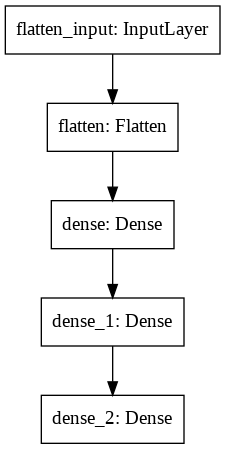

In [19]:
keras.utils.plot_model(model)   #generate an image of the model

In [20]:
model.layers

In [22]:
#the model's list of layers to fetch a layer by its index, or can fetch it by name
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer('dense') is hidden1

True

In [24]:
#all the parameters of a layer can be accessed using its get_weights() and set_weights()
weights,biases = hidden1.get_weights()
weights

array([[-0.06381238,  0.0055686 , -0.03457619, ..., -0.02949374,
         0.0719256 , -0.01551007],
       [-0.01211055, -0.03813108,  0.00330274, ..., -0.04431108,
         0.05908404, -0.05142544],
       [ 0.03193472, -0.00019572,  0.03280018, ...,  0.00847226,
         0.05452254, -0.023502  ],
       ...,
       [-0.04408689,  0.03782158, -0.0013758 , ...,  0.04095878,
        -0.04719466, -0.05596114],
       [-0.05954766,  0.00175668, -0.03555544, ..., -0.04845006,
         0.02863908, -0.06235343],
       [-0.02574037, -0.00165716, -0.06590451, ...,  0.00921091,
        -0.02987083, -0.0508888 ]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

Notice that the Dense layer initialized the connection weights randomly  the biases were initialized to
zeros,can
set kernel_initializer to change it


In [0]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])    #SGD classitier